In [1]:
print("Week-3 of Project Started")

Week-3 of Project Started


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import feature_selection as fs
import numpy.random as nr

In [3]:
d= pd.read_csv(r'data_cleaned.csv')

In [4]:
d.shape

(1700, 18)

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              1700 non-null   object 
 1   year                 1700 non-null   int64  
 2   cereal_yield         1700 non-null   float64
 3   fdi_perc_gdp         1700 non-null   float64
 4   en_per_gdp           1700 non-null   float64
 5   en_per_cap           1700 non-null   float64
 6   co2_ttl              1700 non-null   float64
 7   co2_per_cap          1700 non-null   float64
 8   co2_per_gdp          1700 non-null   float64
 9   pop_urb_aggl_perc    1700 non-null   float64
 10  prot_area_perc       1700 non-null   float64
 11  gdp                  1700 non-null   float64
 12  gni_per_cap          1700 non-null   float64
 13  under_5_mort_rate    1700 non-null   float64
 14  pop_growth_perc      1700 non-null   float64
 15  pop                  1700 non-null   f

In [6]:
d.dtypes

,0
country,object
year,int64
cereal_yield,float64
fdi_perc_gdp,float64
en_per_gdp,float64
en_per_cap,float64
co2_ttl,float64
co2_per_cap,float64
co2_per_gdp,float64
pop_urb_aggl_perc,float64


In [7]:
d.describe()

,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1.700000e+03
mean,1999.570588,3013.317581,2.948940,249.822736,1968.979736,9.793999e+05,4.676663,482.303784,21.480126,12.201789,1.058568e+12,7898.668664,51.971955,1.451313,3.060142e+08,2.252231,1.347903e+08
std,5.143070,1796.206082,3.949722,186.195019,1959.419972,3.235692e+06,4.906273,392.192230,12.105158,9.116682,3.921323e+12,11592.516937,51.332162,1.129312,9.482329e+08,1.642009,4.145755e+08
min,1991.000000,175.700000,-15.027675,66.335372,116.511476,7.077310e+02,0.029411,45.552592,3.526316,0.000000,9.826326e+08,80.000000,3.200000,-2.397174,1.909812e+06,-2.757210,1.151309e+06
25%,1995.000000,1683.364736,0.834105,136.320490,542.882788,1.462125e+04,0.922769,257.139562,12.383953,5.839844,1.636221e+10,780.000000,10.000000,0.630306,9.973065e+06,0.925308,5.469794e+06
50%,2000.000000,2584.800000,1.993220,197.624918,1089.225939,7.728386e+04,3.093346,368.415567,18.525960,10.293791,9.882942e+10,2150.770301,32.350000,1.519890,2.689207e+07,2.315122,1.423239e+07
75%,2004.000000,3933.400000,3.702149,286.474936,2893.996077,3.708446e+05,7.441195,586.972993,28.988324,16.599298,4.122600e+11,9205.000000,79.925741,2.276853,8.234386e+07,3.364747,4.835246e+07
max,2008.000000,8410.800000,51.373951,1383.380011,12607.839262,3.064936e+07,37.106499,3343.454250,60.505780,53.749825,5.580488e+13,58620.000000,239.100000,11.180657,6.610030e+09,12.829046,3.264974e+09


In [8]:
d.columns

Index(['country', 'year', 'cereal_yield', 'fdi_perc_gdp', 'en_per_gdp',
       'en_per_cap', 'co2_ttl', 'co2_per_cap', 'co2_per_gdp',
       'pop_urb_aggl_perc', 'prot_area_perc', 'gdp', 'gni_per_cap',
       'under_5_mort_rate', 'pop_growth_perc', 'pop', 'urb_pop_growth_perc',
       'urb_pop'],
      dtype='object')

In [9]:
d.index

RangeIndex(start=0, stop=1700, step=1)

In [10]:
random_state_num = 0 # after removing outliers

In [11]:
# after removing outliers
d = d[d['country']!='ARE']

In [12]:
d.shape

(1686, 18)

In [13]:
features_cols = ['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap',
                'pop_urb_aggl_perc', 'prot_area_perc', 'pop_growth_perc', 'urb_pop_growth_perc']
label_col = ['co2_per_cap']

In [14]:
X=np.array(d[features_cols])
X

array([[4.17400000e+02, 5.44951458e+00, 8.20000000e+02, ...,
        1.23998220e+01, 3.03486601e+00, 6.68703163e+00],
       [2.66610000e+03, 1.28557882e+00, 3.96000000e+03, ...,
        4.77246763e+00, 1.37259322e+00, 1.76263616e+00],
       [1.60330000e+03, 1.30691206e+00, 1.83800000e+04, ...,
        7.91527300e+00, 1.27457750e+00, 1.43837778e+00],
       ...,
       [4.05530000e+03, 3.50366162e+00, 5.86000000e+03, ...,
        6.85955008e+00, 1.10405722e+00, 1.89744981e+00],
       [7.71500000e+02, 1.47989700e+01, 1.60000000e+02, ...,
        9.98656658e+00, 2.76328559e+00, 4.60583400e+00],
       [2.14400000e+03, 6.41099075e+00, 9.70000000e+02, ...,
        3.59830177e+01, 2.65395608e+00, 3.04999620e+00]])

In [15]:
X.shape

(1686, 8)

In [16]:
y=np.array(d[label_col])
y

array([[ 0.40994892],
       [ 3.53607278],
       [16.28848982],
       ...,
       [ 8.93320268],
       [ 0.0450782 ],
       [ 0.15254961]])

In [17]:
y.shape

(1686, 1)

In [18]:
# Train-Test-split
nr.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=random_state_num)

In [19]:
X_train.shape

(1348, 8)

In [20]:
X_test.shape

(338, 8)

In [21]:
nr.seed(1)
feature_folds = ms.KFold(n_splits=4, shuffle = True, random_state=random_state_num)
# Define the model
rf_selector = RandomForestRegressor(random_state=random_state_num)

# Define an objects for a model for recursive feature elimination with CV
nr.seed(1)
s= fs.RFECV(estimator = rf_selector, cv = feature_folds, scoring = 'r2', n_jobs=-1)

s= s.fit(X_train, np.ravel(y_train))

s.support_
print("Feature ranking after RFECV:")
print(s.ranking_)

# print the important features
ranks_transform = list(np.transpose(s.ranking_))
chosen_features = [i for i,j in zip(features_cols,ranks_transform) if j==1]
print("Chosen important features:")
print(chosen_features)

Feature ranking after RFECV:
[1 2 1 1 1 1 1 1]
Chosen important features:
['cereal_yield', 'gni_per_cap', 'en_per_cap', 'pop_urb_aggl_perc', 'prot_area_perc', 'pop_growth_perc', 'urb_pop_growth_perc']


In [22]:
X_train_reduced = s.transform(X_train)
X_test_reduced = s.transform(X_test)

print("Training subset shape before the recursive feature elimination: ",X_train.shape)
print("Training subset array shape after the recursive feature elimination: ", X_train_reduced.shape)
print("Test subset array shape after the recursive feature elimination: ",X_test_reduced.shape)

Training subset shape before the recursive feature elimination:  (1348, 8)
Training subset array shape after the recursive feature elimination:  (1348, 7)
Test subset array shape after the recursive feature elimination:  (338, 7)


In [23]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Keep the rest unchanged
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)

# Create the hyperparameter grid
param_grid = {
    'n_estimators': n_estimators,
    'max_features': ['sqrt', 'log2', None] ,
    'max_depth': max_depth,
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [24]:
nr.seed(1)
inside_folds = ms.KFold(n_splits=5, shuffle = True, random_state=random_state_num)

# Define the random forest regressor model object
rf= RandomForestRegressor(random_state=random_state_num)

# Perform a randomized search on the grid
nr.seed(1)
rfm= ms.RandomizedSearchCV(estimator=rf, param_distributions = param_grid,
                                 random_state=random_state_num, refit=True,
                                 cv=inside_folds, scoring = 'r2', return_train_score=True, n_jobs=-1)

In [25]:
rfm.fit(X_train_reduced, np.ravel(y_train))

# Corrected variable name
print("Best Parameters:", rfm.best_params_)

Best Parameters: {'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


In [26]:
rfm_best= rfm.best_estimator_
rfm_best

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=1600,
                      random_state=0)

In [27]:
nr.seed(1)
outside_folds = ms.KFold(n_splits=10, shuffle = True, random_state=random_state_num)

# Evaluate the model on the training subset with cross-validation
nr.seed(1)
cv_eval = cross_val_score(rfm_best, X_train_reduced, y_train, cv = outside_folds, n_jobs=-1)

print('Mean R2 score of all CV folds = %4.3f' % np.mean(cv_eval))
print('Standard deviation of the R2 score over all folds = %4.3f' % np.std(cv_eval))
print('R2 score for each fold:')

# print the R2 score for each fold
for i, j in enumerate(cv_eval):
    print('Fold %2d    %4.3f' % (i+1, j))

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mean R2 score of all CV folds = 0.986
Standard deviation of the R2 score over all folds = 0.004
R2 score for each fold:
Fold  1    0.981
Fold  2    0.979
Fold  3    0.990
Fold  4    0.987
Fold  5    0.985
Fold  6    0.993
Fold  7    0.989
Fold  8    0.982
Fold  9    0.992
Fold 10    0.986


In [28]:
predictions = rfm_best.predict(X_test_reduced)

# calculate the metrics basing on the predicted and true values for the test subset
r2 = r2_score(y_true=y_test, y_pred=predictions)
mse = mean_squared_error(y_true=y_test, y_pred=predictions)
rmse = np.sqrt(mse)
print(f"R2 = {r2}, Mean Squared Error (MSE) = {mse}, Root Mean Squared Error (RMSE) = {rmse}")

R2 = 0.9834303770922288, Mean Squared Error (MSE) = 0.31131625203288366, Root Mean Squared Error (RMSE) = 0.5579572134428263


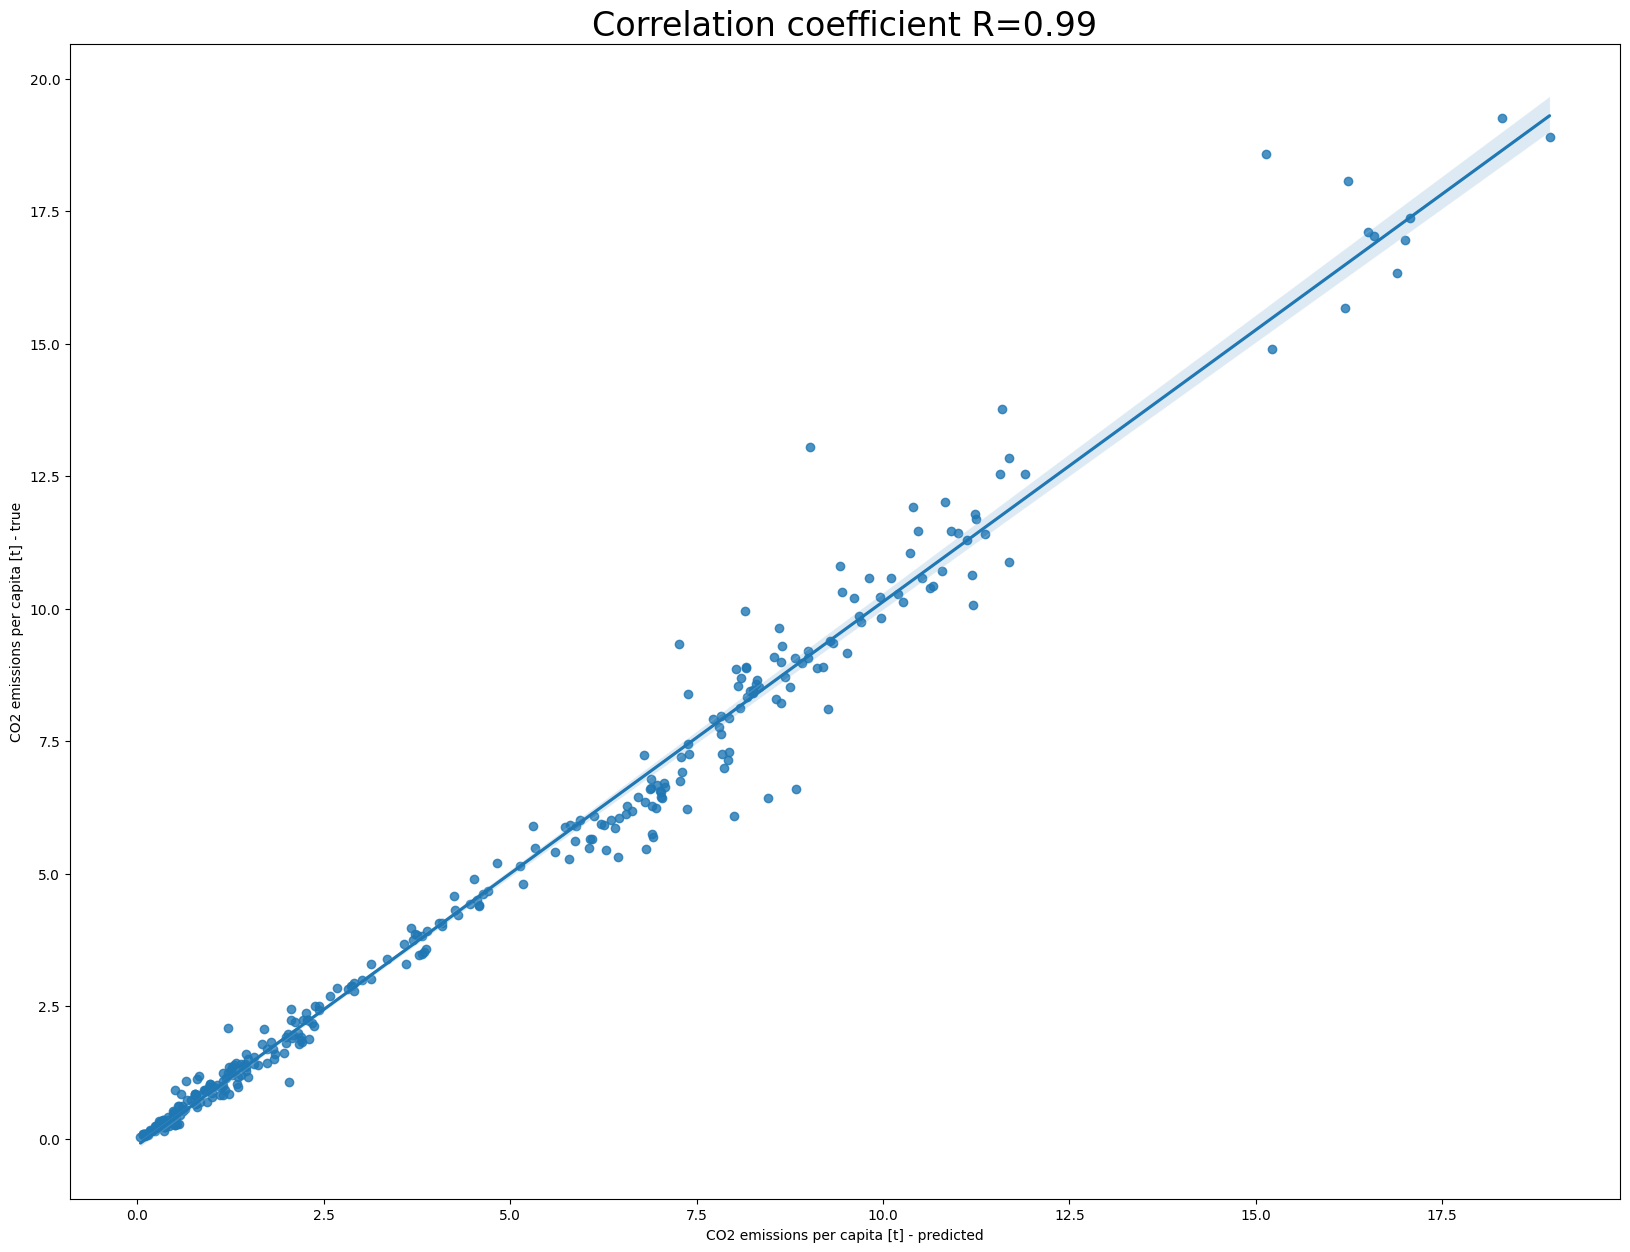

In [29]:
import seaborn as sns
# plot predicted vs true values of the test subset

f,ax=plt.subplots(figsize=(20,15))
sns.set_theme(font_scale=2)

sns.regplot(x=predictions, y=np.transpose(y_test)[0,:], fit_reg=True)
plt.xlabel("CO2 emissions per capita [t] - predicted")
plt.ylabel("CO2 emissions per capita [t] - true")
plt.title("Correlation coefficient R="+str(round(np.corrcoef(predictions,np.transpose(y_test)[0,:])[0,1],2)))
plt.show()

In [30]:
import joblib

# Save the trained model to file
joblib.dump(rfm_best, 'forecasting_co2_emmision.pkl')
print("Model saved to 'forecasting_co2_emmision.pkl")

Model saved to 'forecasting_co2_emmision.pkl


In [31]:
loaded_model = joblib.load('forecasting_co2_emmision.pkl')
print("📂 Model loaded successfully.")

📂 Model loaded successfully.


In [32]:
selected_features = ['cereal_yield', 'gni_per_cap', 'en_per_cap',
                     'pop_urb_aggl_perc', 'prot_area_perc',
                     'pop_growth_perc', 'urb_pop_growth_perc']

In [33]:
selected_countries = ['IND', 'USA', 'PAK', 'RUS', 'NZL','CHN','AUS','JPN','FRA','BRA','CAN']

# Filter the dataset to include only the selected countries
df_filtered = d[d['country'].isin(selected_countries)]

# Dictionary to store the growth rates for each country
growth_rates = {}

# Loop over each selected country
for country in selected_countries:
    # Get data for the current country and sort it by year
    country_data = d[(d['country'] == country)].sort_values('year')

    # Identify the start and end year for the country
    start_year = country_data['year'].min()
    end_year = country_data['year'].max()
    years = end_year - start_year  # Total number of years between start and end

    # Dictionary to store growth rates of all features for the current country
    country_growth = {}

    # Skip this country if the time span is not valid (e.g., only one year of data)
    if years <= 0:
        print(f"Skipping {country} due to insufficient year range.")
        continue

    # Loop through each selected feature
    for feature in selected_features:
        # Get the feature value in the start year
        start_value = country_data[country_data['year'] == start_year][feature].values
        # Get the feature value in the end year
        end_value = country_data[country_data['year'] == end_year][feature].values

        # Skip if either value is missing
        if len(start_value) == 0 or len(end_value) == 0:
            continue

        # Extract scalar values from arrays
        start_value = start_value[0]
        end_value = end_value[0]

        # Skip if values are non-positive or not finite (e.g., NaN, inf)
        if start_value <= 0 or end_value <= 0 or not np.isfinite(start_value) or not np.isfinite(end_value):
            continue

        # Compute the Compound Annual Growth Rate (CAGR)
        cagr = (end_value / start_value) ** (1 / years) - 1
        # Store the result in the country-specific dictionary
        country_growth[feature] = cagr

    # Save the growth rates of all features for the current country
    growth_rates[country] = country_growth

In [34]:
print("\nGrowth Rates (CAGR) from {} to {}:\n".format(start_year, end_year))

# Loop through each country and its corresponding growth rate dictionary
for country, features in growth_rates.items():
    print(f"{country}")  # Print the country name with an icon

    # Loop through each feature and its CAGR value
    for feature, rate in features.items():
        # Determine whether to display a plus or minus sign
        sign = '+' if rate >= 0 else '−'

        # Print the feature name and its growth rate percentage (formatted to two decimal places)
        print(f"  • {feature}: {sign}{abs(rate * 100):.2f}%")

    # Add a line break between countries for readability
    print()


Growth Rates (CAGR) from 1991 to 2008:

IND
  • cereal_yield: +1.94%
  • gni_per_cap: +6.85%
  • en_per_cap: +2.12%
  • pop_urb_aggl_perc: +1.26%
  • prot_area_perc: +0.35%
  • pop_growth_perc: −2.28%
  • urb_pop_growth_perc: −1.26%

USA
  • cereal_yield: +2.28%
  • gni_per_cap: +4.26%
  • en_per_cap: −0.12%
  • pop_urb_aggl_perc: +0.40%
  • prot_area_perc: +0.01%
  • pop_growth_perc: −2.16%
  • urb_pop_growth_perc: −2.15%

PAK
  • cereal_yield: +2.29%
  • gni_per_cap: +5.00%
  • en_per_cap: +1.50%
  • pop_urb_aggl_perc: +0.84%
  • prot_area_perc: +0.01%
  • pop_growth_perc: −2.46%
  • urb_pop_growth_perc: −1.01%

RUS
  • cereal_yield: +1.99%
  • gni_per_cap: +7.41%
  • en_per_cap: −0.61%
  • pop_urb_aggl_perc: +0.48%
  • prot_area_perc: +0.46%

NZL
  • cereal_yield: +1.96%
  • gni_per_cap: +5.00%
  • en_per_cap: +0.39%
  • pop_urb_aggl_perc: +1.15%
  • prot_area_perc: +0.17%
  • pop_growth_perc: −2.04%
  • urb_pop_growth_perc: −1.83%

CHN
  • cereal_yield: +1.60%
  • gni_per_cap: +13

In [35]:
last_year = d['year'].max()
future_years = list(range(last_year + 1, last_year + 21))

In [36]:
last_year

2008

In [37]:
future_years

[2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025,
 2026,
 2027,
 2028]

In [38]:
forecast_results = []

# Loop through each selected country for prediction
for country in selected_countries:
    country_data = d[(d['country'] == country)].sort_values('year')

    # Skip countries with missing feature values
    if country_data[selected_features].dropna().empty:
        print(f"Skipping {country} due to missing values.")
        continue

    # Take the latest complete record (most recent year) for the country
    latest_row = country_data[selected_features].dropna().iloc[-1].copy()

    # Forecast for each year into the future
    for year in future_years:
        # Apply the previously calculated CAGR to each feature
        for feature in selected_features:
            growth_rate = growth_rates.get(country, {}).get(feature, 0.0)
            latest_row[feature] *= (1 + growth_rate)

        # Use trained model to predict CO₂ emissions per capita
        input_features = latest_row.values.reshape(1, -1)
        predicted_co2 = loaded_model.predict(input_features)[0]

        # Store the forecast result
        forecast_results.append({
            'country': country,'year': year,
            'co2_percap': predicted_co2
        })

📈 Forecasted CO₂ Emissions per Capita (Next 20 Years)


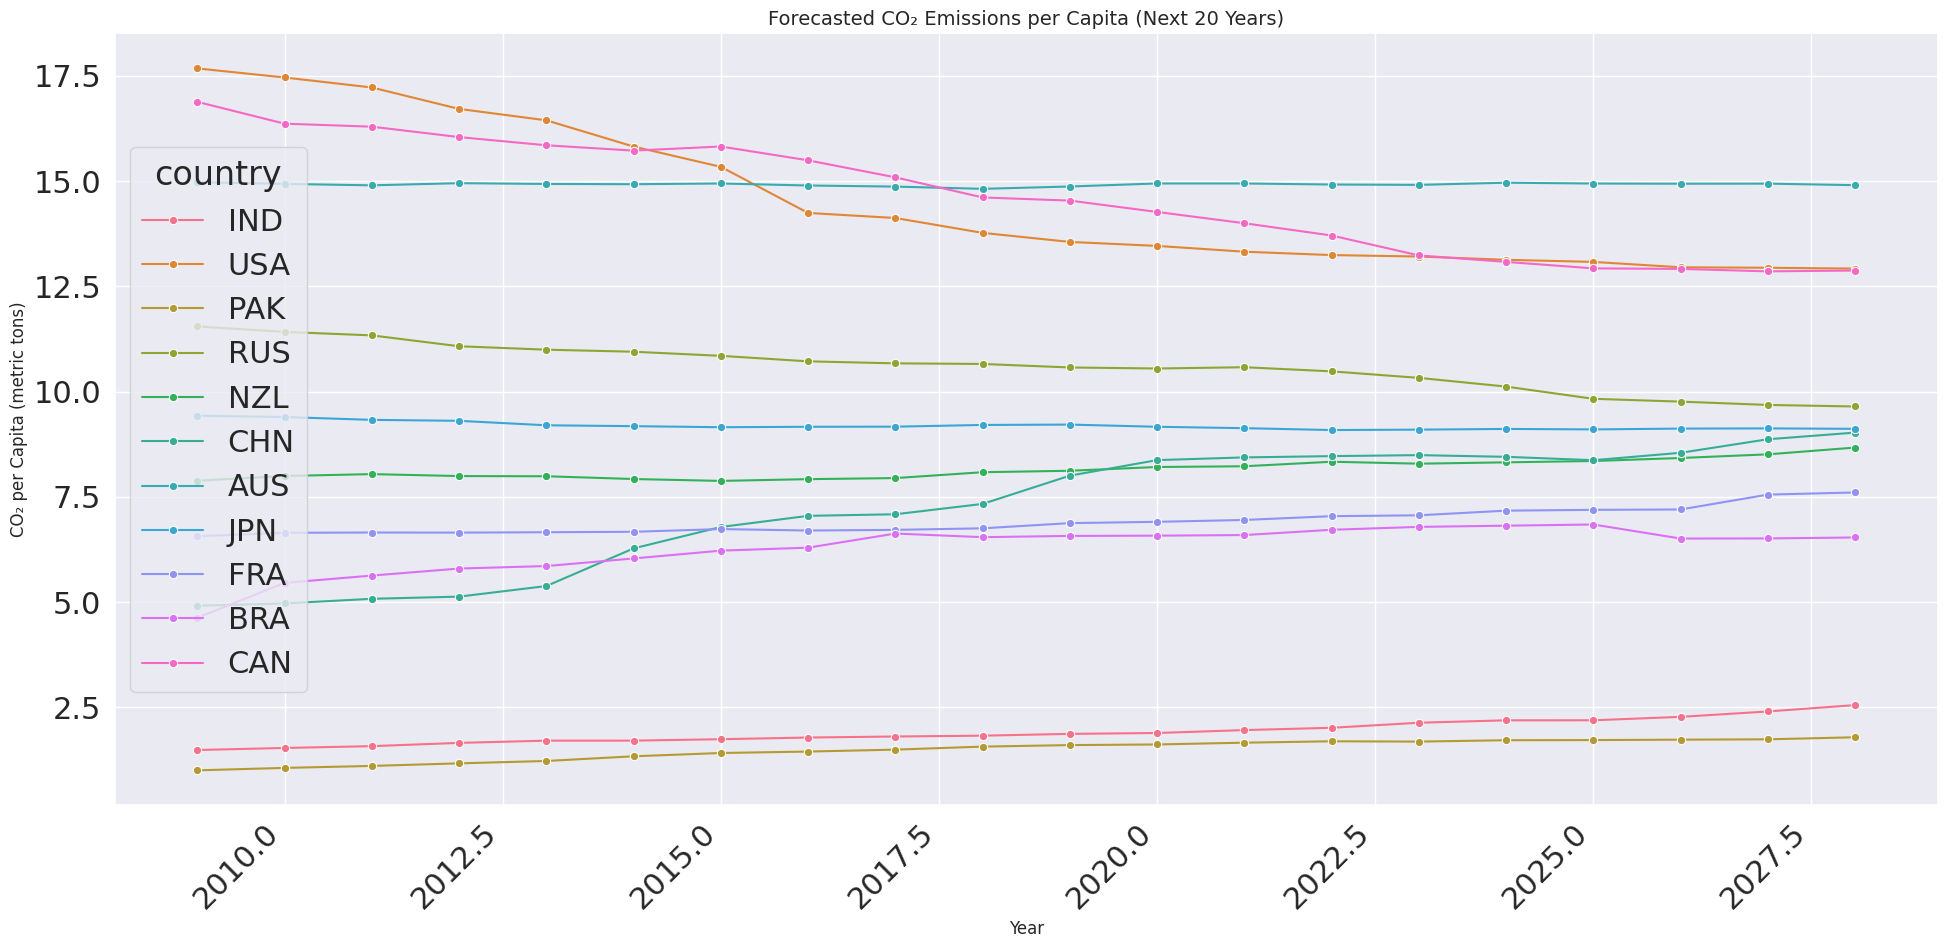


📊 Forecasted CO₂ per Capita for Last 5 Years in Forecast Period (India):

   country  year  co2_percap
15     IND  2024    2.194268
16     IND  2025    2.194939
17     IND  2026    2.276336
18     IND  2027    2.404601
19     IND  2028    2.555710


In [39]:
d_forecast = pd.DataFrame(forecast_results)
# Plot forecasted CO₂ per capita for all countries over the next 20 years
print('📈 Forecasted CO₂ Emissions per Capita (Next 20 Years)')
plt.figure(figsize=(20, 10))
sns.lineplot(data=d_forecast, x='year', y='co2_percap', hue='country', marker='o')
plt.title('Forecasted CO₂ Emissions per Capita (Next 20 Years)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO₂ per Capita (metric tons)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the forecast values for the last 5 years for India
print("\n📊 Forecasted CO₂ per Capita for Last 5 Years in Forecast Period (India):\n")
print(d_forecast[d_forecast['country'] == 'IND'].sort_values(by='year').tail(5))

In [42]:
# getting last 5 years future prediction data for selected countries
def get_last_5_years_df(df, selected_countries):
    frames = []
    for country in selected_countries:
        recent_data = d_forecast[d_forecast['country'] == country].sort_values(by='year').tail(5)
        frames.append(recent_data)
    return pd.concat(frames, ignore_index=True)

In [43]:
get_last_5_years_df(d_forecast, selected_countries)

,country,year,co2_percap
0,IND,2024,2.194268
1,IND,2025,2.194939
2,IND,2026,2.276336
3,IND,2027,2.404601
4,IND,2028,2.555710
5,USA,2024,13.133101
6,USA,2025,13.083224
7,USA,2026,12.955700
8,USA,2027,12.944250
9,USA,2028,12.924468


In [44]:
# getting first 5 years future prediction data for selected countries
def get_first_5_years_df(df, selected_countries):
    frames = []
    for country in selected_countries:
        recent_data = d_forecast[d_forecast['country'] == country].sort_values(by='year').head(5)
        frames.append(recent_data)
    return pd.concat(frames, ignore_index=True)

In [45]:
get_first_5_years_df(d_forecast, selected_countries)

,country,year,co2_percap
0,IND,2009,1.489093
1,IND,2010,1.537712
2,IND,2011,1.580570
3,IND,2012,1.658080
4,IND,2013,1.711206
5,USA,2009,17.679134
6,USA,2010,17.463796
7,USA,2011,17.226236
8,USA,2012,16.717246
9,USA,2013,16.446681


This plot illustrates the projected trends of CO₂ emissions per capita for eleven countries — USA, RUS, NZL, IND, PAK,CHN,AUS,BRA,FRA,JPN and CAN — over a 20-year period.

🔍 Key Insights:
USA:

Starts with the highest CO₂ emissions per capita (~17 metric tons) but shows a steady decline over time. Despite the drop, it remains the highest emitter per person.
RUS:

Has relatively stable emissions with a slight downward trend, indicating moderate policy or behavioral changes.
NZL:

Shows gradual growth in emissions per capita, which may suggest increased industrial or transport-related emissions.
IND & PAK:

Begin with very low per capita emissions (~1.5–2 metric tons) but display a gradual upward trend.
This suggests economic growth and development, which often correlate with increased energy use.

Developed nations (like the USA and Russia) are reducing their per capita emissions, likely due to energy transition policies and technology upgrades.

Developing countries (like India and Pakistan) are on an upward trajectory, likely due to industrialization and increased energy demand.

This indicates a global convergence of emissions, but with differing starting points and growth rates.